In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
transform = transforms.ToTensor()

In [9]:
train_data = datasets.MNIST(root=r"C:\Users\akhil\Downloads\data",train=True,download=True,transform=transform)

100.0%


Extracting C:\Users\akhil\Downloads\data\MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\akhil\Downloads\data\MNIST\raw


100.0%


Extracting C:\Users\akhil\Downloads\data\MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\akhil\Downloads\data\MNIST\raw




47.7%

100.0%


Extracting C:\Users\akhil\Downloads\data\MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\akhil\Downloads\data\MNIST\raw



100.0%

Extracting C:\Users\akhil\Downloads\data\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\akhil\Downloads\data\MNIST\raw



In [10]:
test_data = datasets.MNIST(root=r"C:\Users\akhil\Downloads\data",train=False,download=True,transform=transform)

In [11]:
image,label = train_data[0]

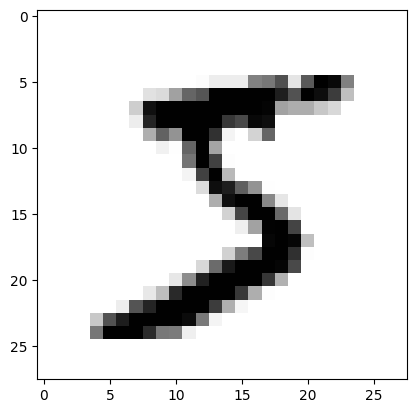

In [12]:
plt.imshow(image.reshape((28,28)),cmap='gist_yarg')

In [13]:
torch.manual_seed(101)
train_loader = DataLoader(train_data,batch_size=100,shuffle=True)
test_loader = DataLoader(test_data,batch_size=500,shuffle=False)

In [14]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x:f'{x:4}'))

In [15]:
for images,labels in train_loader:
    break

In [16]:
images.shape

torch.Size([100, 1, 28, 28])

In [17]:
labels.shape

torch.Size([100])

In [18]:
labels[:12].numpy()

array([   7,    2,    3,    5,    8,    5,    3,    6,    9,    9,    1,
          3], dtype=int64)

Labels:  [   7    2    3    5    8    5    3    6    9    9    1    3]


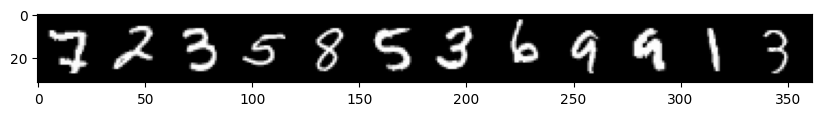

In [19]:
print('Labels: ',labels[:12].numpy())

im = make_grid(images[:12],nrow=12)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [20]:
class MultilayerPerceptron(nn.Module):
    
    def __init__(self,in_sz=784,out_sz=10,layers=[120,84]):
        super().__init__()
        
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
        
    def forward(self,X):
        
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X,dim=1)

In [21]:
torch.manual_seed(101)

model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [22]:
for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [24]:
images.shape

torch.Size([100, 1, 28, 28])

In [25]:
images.view(100,-1).shape

torch.Size([100, 784])

In [26]:
import time

start_time = time.time()

epochs = 10

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    for b,(X_train,y_train) in enumerate(train_loader):
        
        b+=1
        y_pred = model(X_train.view(100,-1))
        loss = criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr+=batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200==0:
            acc = trn_corr.item()*100/(100*b)
            print(f'Epoch {i} batch {b} loss:{loss.item()} accuracy:{acc}')
        
        
    train_losses.append(loss.item())
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        
        for b,(X_test,y_test) in enumerate(test_loader):
            
            y_val = model(X_test.view(500,-1))
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr +=(predicted==y_test).sum()
            
    loss = criterion(y_val,y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr)

total_time = time.time() - start_time
print(f'Duration:{total_time/60} mins')

Epoch 0 batch 200 loss:0.2356238216161728 accuracy:83.245
Epoch 0 batch 400 loss:0.3533070683479309 accuracy:87.5325
Epoch 0 batch 600 loss:0.13734400272369385 accuracy:89.58166666666666
Epoch 1 batch 200 loss:0.24684995412826538 accuracy:94.87
Epoch 1 batch 400 loss:0.14273887872695923 accuracy:95.085
Epoch 1 batch 600 loss:0.0733654797077179 accuracy:95.355
Epoch 2 batch 200 loss:0.08371470123529434 accuracy:96.515
Epoch 2 batch 400 loss:0.06228962913155556 accuracy:96.6125
Epoch 2 batch 600 loss:0.06475143879652023 accuracy:96.705
Epoch 3 batch 200 loss:0.117899090051651 accuracy:97.65
Epoch 3 batch 400 loss:0.05712112784385681 accuracy:97.4775
Epoch 3 batch 600 loss:0.031934332102537155 accuracy:97.48833333333333
Epoch 4 batch 200 loss:0.10764962434768677 accuracy:98.09
Epoch 4 batch 400 loss:0.04543372616171837 accuracy:97.97
Epoch 4 batch 600 loss:0.05657264590263367 accuracy:97.99
Epoch 5 batch 200 loss:0.007679496891796589 accuracy:98.39
Epoch 5 batch 400 loss:0.037713475525379

In [27]:
for i in zip(train_losses,test_losses):
    print(i[0],i[1])

0.13734400272369385 0.2956961393356323
0.0733654797077179 0.21293485164642334
0.06475143879652023 0.18322968482971191
0.031934332102537155 0.15632790327072144
0.05657264590263367 0.15077641606330872
0.059891484677791595 0.1473947912454605
0.08691195398569107 0.12795260548591614
0.04425487667322159 0.14795035123825073
0.07259717583656311 0.1883280724287033
0.02176786959171295 0.1497606784105301


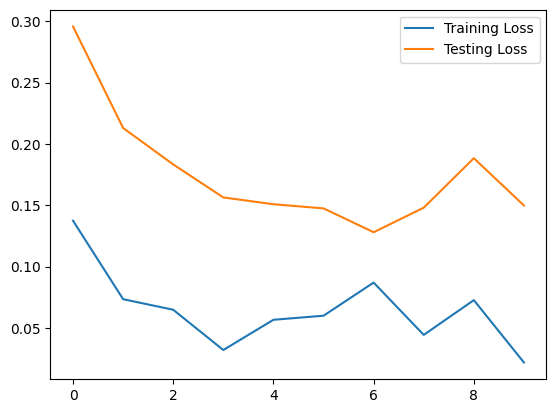

In [28]:
plt.plot(train_losses,label='Training Loss')
plt.plot(test_losses,label='Testing Loss')
plt.legend()

In [29]:
train_acc = [t/600 for t in train_correct]
test_acc = [t/100 for t in test_correct]

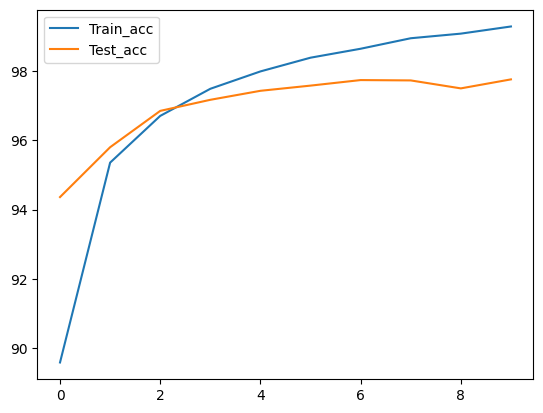

In [30]:
plt.plot(train_acc,label='Train_acc')
plt.plot(test_acc,label='Test_acc')
plt.legend()

In [31]:
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [32]:
with torch.no_grad():
    correct=0
    for X_test,y_test in test_load_all:
        y_val = model(X_test.view(len(X_test),-1))
        predicted = torch.max(y_val,1)[1]
        correct += (predicted==y_test).sum()

In [33]:
100*correct.item()/len(test_data)

97.76

In [34]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[ 972,    0,    4,    1,    1,    2,    5,    3,    4,    3],
       [   0, 1123,    3,    0,    0,    0,    3,    7,    0,    2],
       [   1,    3, 1004,    3,    1,    0,    1,    8,    3,    0],
       [   3,    2,    4,  985,    0,   11,    1,    1,    3,    1],
       [   0,    0,    2,    0,  966,    3,    1,    2,    2,   11],
       [   0,    1,    0,    8,    0,  864,    3,    0,    4,    3],
       [   1,    2,    2,    0,    5,    2,  943,    1,    1,    0],
       [   0,    0,    3,    4,    1,    2,    0,  983,    2,    0],
       [   2,    4,   10,    3,    0,    6,    1,    4,  950,    3],
       [   1,    0,    0,    6,    8,    2,    0,   19,    5,  986]],
      dtype=int64)